In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
sns.set_style("dark")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score

%pylab inline
data=None
def absolute_correlations(col, df=data):
    #absolute_values = np.abs(df[col])
    corrs = pd.DataFrame(df.select_dtypes(include=[np.number]).corrwith(df[col]), columns=['correlation'])
    corrs['absol'] = np.abs(corrs['correlation'])
    return corrs.sort_values('absol', ascending=False).drop('absol', axis=1).tail(len(corrs)-1)

def numeric(self):
    '''Monkey-patches numeric features'''
    return self.select_dtypes(include=[np.number])
pd.DataFrame.numeric = numeric

Populating the interactive namespace from numpy and matplotlib


In [65]:
data = pd.read_csv('data_cleaned.csv')
del data['Unnamed: 0']

# Use only good data

# Users could enter any number for age, so let's remove the jokers
data = data[data['age'] < 71]

# Simplify genders down to two, for convenience
data = data[(data['gender'] < 3) & (data['gender'] > 0)]
data['gender'] = lbl.fit_transform(data['gender']).flatten()

# Those who found the results accurate
data = data[data.accuracy >= 80]

# 905 rows, 39 features
data.shape

(905, 39)

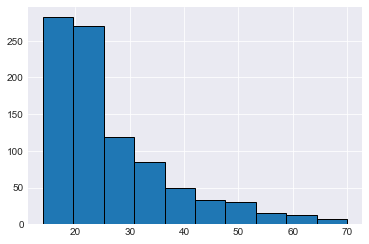

In [66]:
data['age'].hist(edgecolor='black')

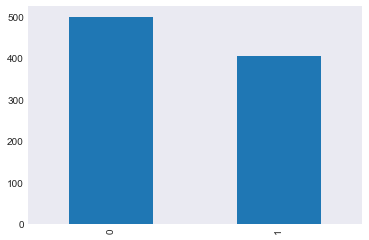

In [67]:
data['gender'].value_counts().plot.bar()

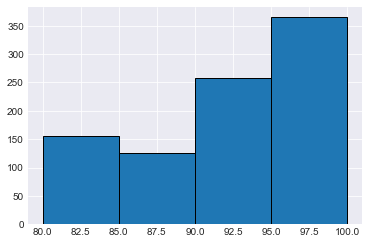

In [68]:
data['accuracy'].hist(edgecolor='black', bins=4)

In [53]:
# TODO: Male vs female humor

In [ ]:
# TODO: Humor by age

# Predicting age

For the machine learning tasks, I'm just going to use cross_val_score and not bother with train/test sets. This project is too casual for that!

In [57]:
from xgboost import XGBRegressor

x = data.drop('age', axis=1)
y = data['age']

clf = XGBRegressor()
params = {'max_depth': [2,3],
         'n_estimators': np.arange(10,50,10),
         'reg_lambda': np.arange(1.0, 1.31, .1)}

grid = GridSearchCV(clf, param_grid=params, cv=3, scoring='neg_mean_absolute_error').fit(x, y)
clf = grid.best_estimator_

cv = cross_val_score(clf, x, y, cv=4, scoring='neg_mean_absolute_error')

print(clf, '\n')
print('Predicts the age within {} years'.format(round(-cv.mean(), 1)))
print('Std Dev:   ', cv.std())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1000000000000001, scale_pos_weight=1,
       seed=0, silent=True, subsample=1) 

Predicts the age within 7.6 years
Std Dev:    0.551163019081


# Predicting gender

In [64]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelBinarizer

x = data.drop('gender', axis=1)

lbl = LabelBinarizer()
y = 

clf = XGBClassifier()
params = {'max_depth': [2,3,4,5],
         'n_estimators': np.arange(10,50,10),
         'reg_lambda': np.arange(1.0, 1.91, .1)}

grid = GridSearchCV(clf, param_grid=params, cv=3, scoring='roc_auc').fit(x, y)
clf = grid.best_estimator_

cv = cross_val_score(clf, x, y, cv=4, scoring='roc_auc')

print(clf, '\n')
print('Mean ROC-AUC:', cv.mean())
print('Std Dev:     ', cv.std())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1.1000000000000001, scale_pos_weight=1,
       seed=0, silent=True, subsample=1) 

Mean ROC-AUC: 0.605391186177
Std Dev:      0.0215134132667
